---

## Interference
### Diffraction grating in H terms.

6 October 2024
<br>
Burton Rosenberg

---


In [1]:

import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli 
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from IPython.display import display, Math, HTML
import time, math
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')


qiskit version: 1.1.2



In the following circuit, the sampling superposition is taged with the parity of $i$,
$$
\sum_i |i,\oplus \,i\,\rangle
$$
The Hadamard shows that all bits are now maximally entangled. 

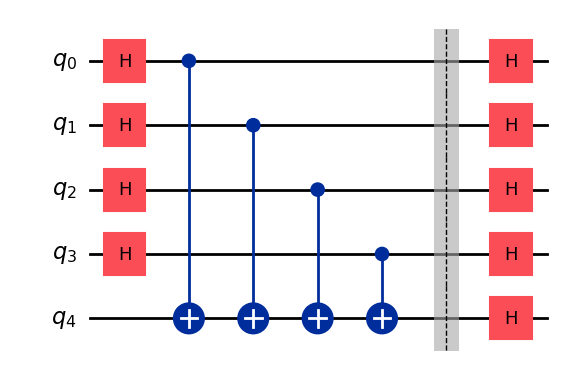

'before the barrier'

<IPython.core.display.Latex object>

'after the barrier'

<IPython.core.display.Latex object>

In [17]:
n = 5

def xorish(n, omit_h=-1):
    qc = QuantumCircuit(n)
    #qc.x(n-1)
    #qc.h(n-1)
    for i in range(n-1):
        qc.h(i)
        qc.cx(i,n-1)
    sv = Statevector(qc)
    qc.barrier()
    for i in range(n):
        if omit_h!=i:
            qc.h(i)        
    return (qc,sv, Statevector(qc))

qc, sv1, sv2  = xorish(n)
display(qc.draw('mpl'))
display('before the barrier',sv1.draw('latex'))
display('after the barrier',sv2.draw('latex'))

qc.measure_all()
basic_sim = BasicSimulator()
job = basic_sim.run(qc,shots=1024)
result = job.result()
display(HTML('<tt>Sampling the wave function:  '+ f'{result.get_counts()}' +'</tt>'))


The $H$ on any particular wire does not matter to the entanglement of the remaining qubits.

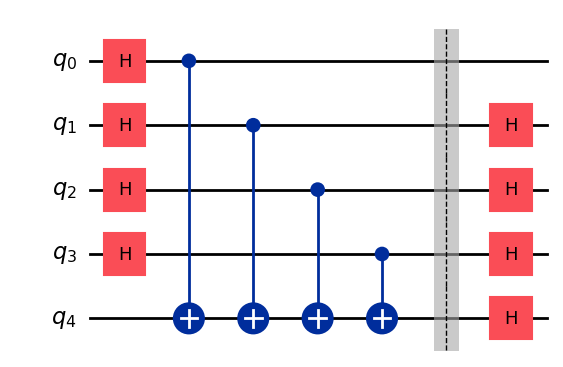

'before the barrier'

<IPython.core.display.Latex object>

'after the barrier'

<IPython.core.display.Latex object>

In [19]:
qc, sv1, sv2  = xorish(n,omit_h=0)
display(qc.draw('mpl'))
display('before the barrier',sv1.draw('latex'))
display('after the barrier',sv2.draw('latex'))

qc.measure_all()
basic_sim = BasicSimulator()
job = basic_sim.run(qc,shots=1024)
result = job.result()
display(HTML('<tt>Sampling the wave function:  '+ f'{result.get_counts()}' +'</tt>'))

And if there are blocks of such entanglement, they act by the tensor product of entangled bits.

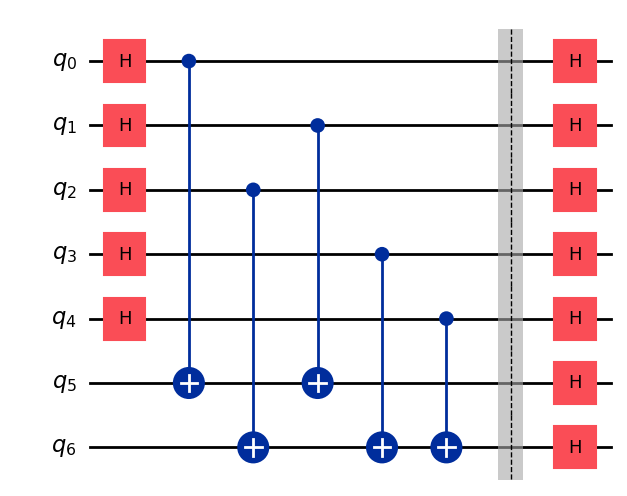

'before the barrier'

<IPython.core.display.Latex object>

'after the barrier'

<IPython.core.display.Latex object>

In [15]:
n = 7

def two_xorish(n, show_circuit=False):
    qc = QuantumCircuit(n)
    m = (n-2)//2 
    for i in range(n-2):
        qc.h(i)
        if i<m:
            qc.cx(i,n-2)
        else:
            qc.cx(i,n-1)
    sv = Statevector(qc)
    qc.barrier()
    for i in range(n):
        qc.h(i)        
    return (qc,sv, Statevector(qc))

qc, sv1, sv2  = two_xorish(n)
display(qc.draw('mpl'))
display('before the barrier',sv1.draw('latex'))
display('after the barrier',sv2.draw('latex'))

qc.measure_all()
basic_sim = BasicSimulator()
job = basic_sim.run(qc,shots=1024)
result = job.result()
display(HTML('<tt>Sampling the wave function:  '+ f'{result.get_counts()}' +'</tt>'))


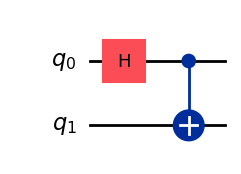

<IPython.core.display.Latex object>

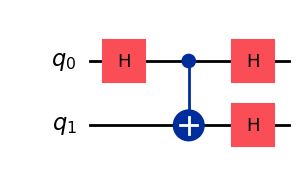

<IPython.core.display.Latex object>

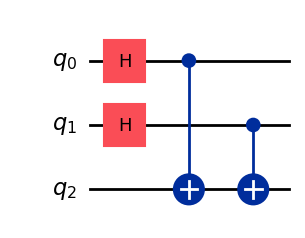

<IPython.core.display.Latex object>

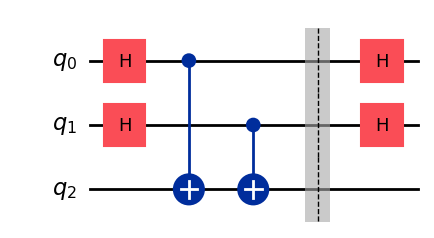

<IPython.core.display.Latex object>

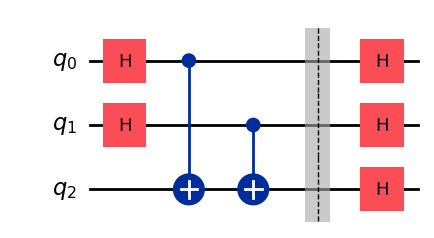

<IPython.core.display.Latex object>

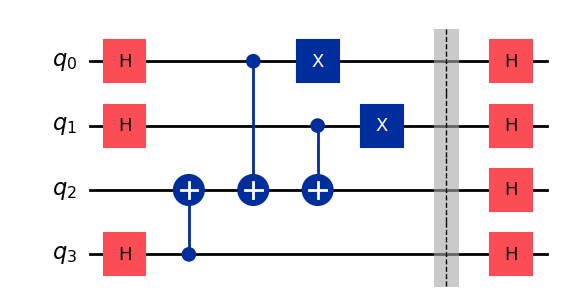

<IPython.core.display.Latex object>

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
sv = Statevector(qc)
display(qc.draw('mpl'),sv.draw('latex'))
qc.h(0)
qc.h(1)  # needed
sv = Statevector(qc)
display(qc.draw('mpl'),sv.draw('latex'))
# how come?


qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(0,2)
qc.cx(1,2)
sv = Statevector(qc)

display(qc.draw('mpl'))
display(sv.draw('latex'))


def test_C(bits):
    qc = QuantumCircuit(3)
    i = 0
    while bits>0:
        if bits%2==1:
            qc.x(i)
        i += 1
        bits //= 2
    for i in range(3):
        qc.h(i)
    return qc, Statevector(qc)

def for_bits():
    for bits in [0,3,5,6]:
        qc, sv = test_C(bits)
        #display(qc.draw('mpl'))
        if bits==0:
            display(qc.draw('mpl'))
        display(bits,sv.draw('latex'))
    
def half_circuit():
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.h(1)
    qc.cx(0,2)
    qc.cx(1,2)
    qc.barrier()
    qc.h(0)
    qc.h(1)
    return qc, Statevector(qc)


def full_circuit():
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.h(1)
    qc.cx(0,2)
    qc.cx(1,2)
    qc.barrier()
    qc.h(0)
    qc.h(1)
    qc.h(2)
    return qc, Statevector(qc)


qc, sv = half_circuit()
display(qc.draw('mpl'))
display(sv.draw('latex'))
qc, sv = full_circuit()
display(qc.draw('mpl'))
display(sv.draw('latex'))


qc = QuantumCircuit(4)
#qc.x(0)
#qc.x(1)
#qc.x(2) # does not matter
qc.h(0)
qc.h(1)
qc.h(3)

qc.cx(3,2)
qc.cx(0,2)
qc.cx(1,2)
qc.x(1)
qc.x(0)
qc.barrier()
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
display(qc.draw('mpl'))
display(Statevector(qc).draw('latex'))